In [ ]:
#Question 1


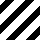
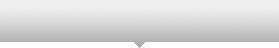
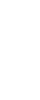
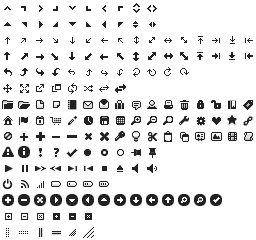
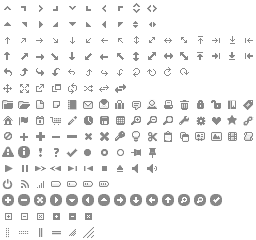
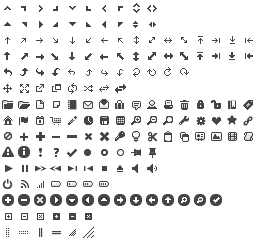
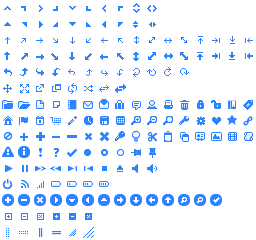
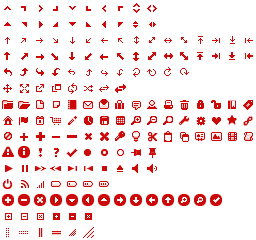
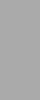
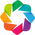
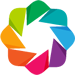
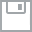
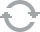
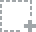
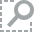
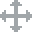
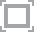
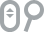

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from bokeh.plotting import figure,show,output_notebook
output_notebook()

# Statsmodel APIs
import statsmodels.api as sm

import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge, Lasso

%matplotlib inline

In [59]:
x = np.array([0, 0.5, 1.0, 1.5, 2.0,2.5]) 
y = np.array([0, 20.5, 31.36, 36.26, 30.41, 28.23]) 
XX = np.c_[x, x**2]
#if it was of a higher order, for example of the third order, X = np.c_[x, x**2, x**3] 

In [60]:
XX.shape

(6, 2)

In [61]:
XX

array([[ 0.  ,  0.  ],
       [ 0.5 ,  0.25],
       [ 1.  ,  1.  ],
       [ 1.5 ,  2.25],
       [ 2.  ,  4.  ],
       [ 2.5 ,  6.25]])

In [62]:
results = sm.OLS(y, XX).fit()
results.params    

array([ 43.91718012, -13.38546584])

In [68]:
p = figure(title='loop.')
p.circle(x,y,color="blue",size=8)

v,a = results.params
print v,a
x1 = np.array(range(0,250))*0.03

#100 points within a distance of 0.03
#constricts it between 0 and 3 

y1= []
for t in x1:
    y1.append(v*t+a*t**2)
    
p.line(x1,y1, color='red')

show(p)

    
    
    
#can run though it removing cubed values and j terms and has a much more direct porablic function

43.9171801242 -13.3854658385


In [69]:
for a,b in zip(x1,y1):
        if (-5 < b) & (b < 5) :
            print a,b
              
#creating a logic test
#Correct answer is 3.27 seconds is the closest 

0.0 0.0
0.03 1.30546848447
0.06 2.58684313043
0.09 3.84412393789
3.18 4.29744804969
3.21 3.04896965217
3.24 1.77639741615
3.27 0.479731341615
3.3 -0.841028571429
3.33 -2.18588232298
3.36 -3.55482991304
3.39 -4.94787134161


In [ ]:
#Question 2

In [86]:
c = np.array([1976, 1980, 1987, 1993, 1998])
z = np.array([618, 860, 1324, 1865, 2256])



In [90]:
X = sm.add_constant(c, prepend=True)
X

array([[  1.00000000e+00,   1.97600000e+03],
       [  1.00000000e+00,   1.98000000e+03],
       [  1.00000000e+00,   1.98700000e+03],
       [  1.00000000e+00,   1.99300000e+03],
       [  1.00000000e+00,   1.99800000e+03]])

In [98]:
results = sm.OLS(z, X).fit()
results.params

# function takes y values first then x REMEMBER

array([ -1.48005980e+05,   7.51915545e+01])

In [100]:
p = figure(title='Cost of Healthcare Prediction')
p.circle(c,z,color='green',size=10)


l,k = results.params
print l,k
q1 = np.array(range(1975,2000))


j1= []
for t in q1:
    j1.append(k*t+l)
    
p.line(q1,j1, color='red')

show(p)


-148005.980416 75.1915544676


In [20]:
#Question 3 #plot it first before you do anything

In [54]:
e = np.array([-1,0,1,2,3,5,7,9])
f = np.array([-1,3,2.5,5,4,2,5,4])
g = np.c_[f, f**2, f**3, f**4]

#will need to experiment with how to fit this data set best. 

In [42]:
g

array([[  -1.    ,    1.    ,   -1.    ,    1.    ],
       [   3.    ,    9.    ,   27.    ,   81.    ],
       [   2.5   ,    6.25  ,   15.625 ,   39.0625],
       [   5.    ,   25.    ,  125.    ,  625.    ],
       [   4.    ,   16.    ,   64.    ,  256.    ],
       [   2.    ,    4.    ,    8.    ,   16.    ],
       [   5.    ,   25.    ,  125.    ,  625.    ],
       [   4.    ,   16.    ,   64.    ,  256.    ]])

In [ ]:
#Wine Questions

In [45]:
wine = pd.read_csv('winequality-red.csv')

In [46]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [107]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

In [106]:
wine.quality.value_counts().sum()

1599

In [50]:
import summary from pandas
summary.wine()

SyntaxError: invalid syntax (<ipython-input-50-8d63718ad589>, line 1)

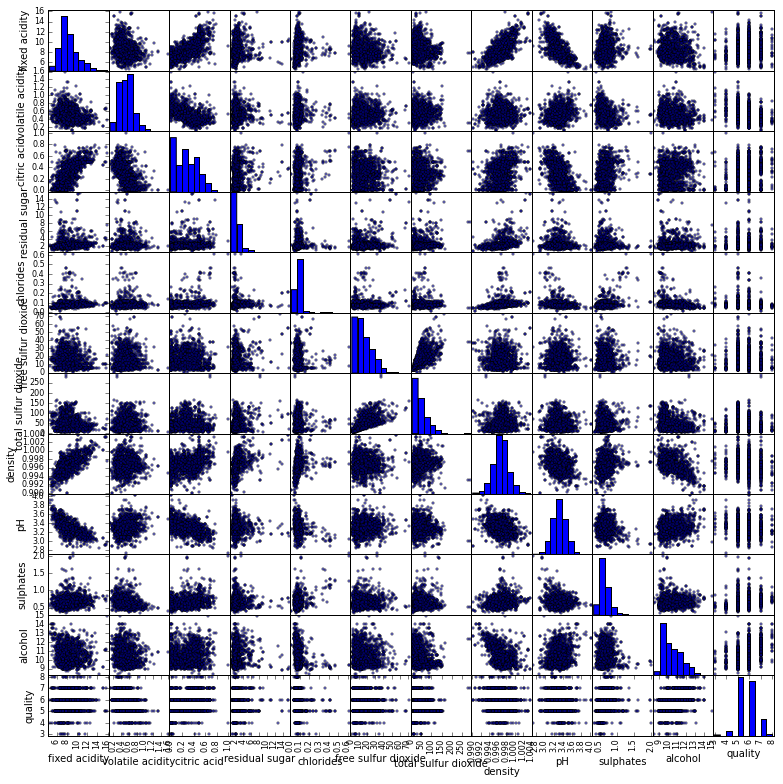

In [47]:
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(wine, figsize = (13,13))

#The wines that have a higher quality score have a strong correlation of choloride concentration
#a medium correlation of residual sugar, sulfur dioxide and volitile acidity
#no or minimal correlation for fixed acidity, citric acid, pH and alcohol. 

#there are 12 features, the data is relatively normalized

In [55]:
x = data['pH'].values
y = data['quality'].values
X = sm.add_constant(x, prepend=True)

In [56]:
results = sm.OLS(y, X).fit()
intercept, slope = results.params

r2 = results.rsquared

p = figure(title='Price vs Sqft')
p.circle(x,y,color="blue",size=8)

x1 = range(min(x),max(x)+1)

# For loop:
y1 = []
for val in x1:
    y1.append(intercept + slope*val)
# This generates y1 again, but with one line of code instead
# List Comprehension:
y1 = [intercept + slope*val for val in x1]

p.line(x1,y1,color='red')

show(p)

TypeError: range() integer end argument expected, got numpy.float64.